# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [63]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

os.getcwd()

'/home/jiholee/Dropbox/Springboard/Capstone1'

In [26]:
df = pd.read_csv('data/step3_output.csv', index_col = 0)
df.head()

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,72.0,1
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,72.0,0
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,0


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

The best performing model from step 4 was the first model that included state dummy variables and had no other columns (except resort name and Adult Weekend ticket prices) removed. The same steps will be taken to recreate this model.

In [27]:
# Create dummy variables for states
state_dummies = pd.get_dummies(df['state'])
df = pd.concat([df.drop(['state'], axis = 1), state_dummies], axis = 1)
df.head()

,Name,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,...,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Alyeska Resort,3939,2500,250,1,0.0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,Eaglecrest Ski Area,2600,1540,1200,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hilltop Ski Area,2090,294,1796,0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Arizona Snowbowl,11500,2300,9200,0,0.0,1,0,2,2,...,0,0,0,0,0,0,0,0,0,0
4,Sunrise Park Resort,11100,1800,9200,0,0.0,0,1,2,3,...,0,0,0,0,0,0,0,0,0,0


As we are trying to predict the AdultWeekend prices for Big Mountain resort, AdultWeekend will be used as the response variable `y`. The name column will also be dropped from the independent variable dataframe as the name of a resort does not give us much information on how Big Mountain should price their tickets. 

This data will then be scaled using sklearn's `StandardScaler()` and `fit()` to scale the data.

In [28]:
X = df.drop(['Name','AdultWeekend'], axis=1)
y = df.AdultWeekend 

scaler = preprocessing.StandardScaler().fit(X)

X_scaled=scaler.transform(X) 

In [29]:
from sklearn.model_selection import train_test_split

y = y.ravel() # flatten y into 1-D array

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [30]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score, mean_absolute_error

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [31]:
y_pred = lm.predict(X_test)

In [32]:
exp_var = explained_variance_score(y_test, y_pred)
MAE = mean_absolute_error(y_test,y_pred)
print('Explained Variance Score: '+str(round(exp_var, 3)))
print('Mean Absolute Error: '+str(round(MAE,3)))
print('Intercept for Linear Regression model: ' +str(round(lm.intercept_, 3)))

Explained Variance Score: 0.93
Mean Absolute Error: 5.173
Intercept for Linear Regression model: 64.105


The **explained variance score** of a linear model measures *how much the response variable is explained by the linear relationship between the independent variables and response variable*. With an explained variance score of 0.931, we can say that **93.1% of the variation in Adult Weekend ticket prices can be explained by the linear relationship between our independent variables and Adult Weekend ticket prices**. As this value gets closer to 1, the model is able to better predict the results. 

The **Mean Absolute Error (MAE)** measures, on average, *how much the predicted values differed from the actual values*. With an MAE of 5.154, this means that, on average, our model was able to **predict within $\pm \$5.15 $ of the actual ticket prices**

The intercept of our model is the expected mean price of Adult Weekend ticket prices when all other variables are not considered. The coefficient values of each variable in the linear regression will then be used to adjust the ticket prices accordingly to each resort's variables. 

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [35]:
bm = df[df['Name'].str.contains('Big Mountain')]
bm

,Name,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,...,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
151,Big Mountain Resort,6817,2353,4464,0,0.0,0,3,2,6,...,0,0,0,0,0,0,0,0,0,0


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [55]:
X_bm = bm.drop(['Name', 'AdultWeekend'], axis = 1)
y_bm = bm.AdultWeekend

X_bm_scaled = scaler.transform(X_bm)
y_bm = y_bm.ravel()

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [58]:
bm_pred = lm.predict(X_bm_scaled)
print('With our model, Big Mountain resort should price their Adult Weekend ticket prices at $'+str(round(bm_pred[0],2))+'.')

With our model, Big Mountain resort should price their Adult Weekend ticket prices at $84.05.


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [59]:
print('The current ticket price for an adult on a weekend at Big Mountain Resort is $'+str(y_bm[0]))

The current ticket price for an adult on a weekend at Big Mountain Resort is $81.0


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

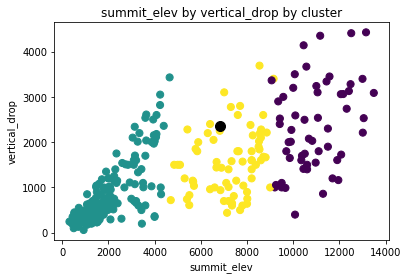

In [61]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(X_bm['summit_elev'], X_bm['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

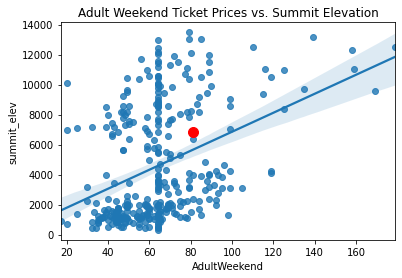

In [72]:
sns.regplot(x = 'AdultWeekend', y = 'summit_elev', data = df)
plt.scatter(bm['AdultWeekend'], bm['summit_elev'], color = 'red', s = 100)
plt.title('Adult Weekend Ticket Prices vs. Summit Elevation')
plt.savefig('figures/fig2.png')

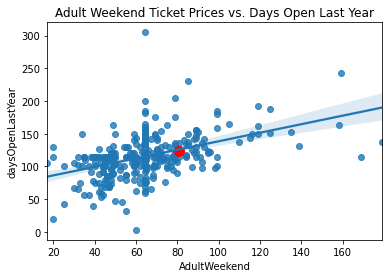

In [74]:
sns.regplot(x = 'AdultWeekend', y = 'daysOpenLastYear', data = df)
plt.scatter(bm['AdultWeekend'], bm['daysOpenLastYear'], color = 'red', s = 100)
plt.title('Adult Weekend Ticket Prices vs. Days Open Last Year')
plt.savefig('figures/fig3.png')

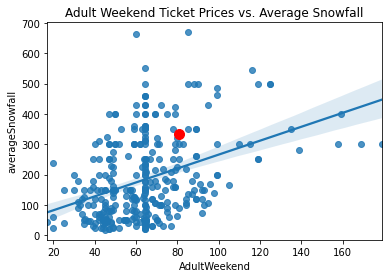

In [82]:
sns.regplot(x = 'AdultWeekend', y = 'averageSnowfall', data = df)
plt.scatter(bm['AdultWeekend'], bm['averageSnowfall'], color = 'red', s = 100)
plt.title('Adult Weekend Ticket Prices vs. Average Snowfall')
plt.savefig('figures/fig4.png')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [90]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [87]:
coeff = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']) 
coeff['MAE'] = mean_absolute_error(y_test, y_pred)
coeff['exp_var'] = explained_variance_score(y_test, y_pred)
coeff.to_csv('models/metrics.csv')